<a href="https://colab.research.google.com/github/Gauravds435/colabtools/blob/master/MultipleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import math
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [1]:
import pandas as pd
from google.colab import files

In [2]:
uploaded = files.upload()

Saving Car Prices.csv to Car Prices.csv


In [3]:
for fn in uploaded.keys():
  print("User uploaded file'{name}' with length {length} bytes".format(name = fn, length=len(uploaded[fn])))

User uploaded file'Car Prices.csv' with length 26717 bytes


In [4]:
uploaded

{'Car Prices.csv': b'car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price\r\n1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111,5000,21,27,13495\r\n2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111,5000,21,27,16500\r\n3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9,154,5000,19,26,16500\r\n4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10,102,5500,24,30,13950\r\n5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8,115,5500,18,22,17450\r\n6,2,audi fox,gas,std,two,sedan,fwd,front,99.

In [5]:
import io

In [7]:
df = pd.read_csv(io.StringIO(uploaded["Car Prices.csv"].decode("utf-8")))
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [10]:
df.drop(['car_ID', 'symboling','aspiration', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio','citympg', 'highwaympg'], axis = 1, inplace = True)

KeyError: ignored

In [12]:
df.drop(["fueltype", "doornumber", "enginetype"], axis = 1, inplace = True)
df

,CarName,enginesize,horsepower,peakrpm,price
0,alfa-romero giulia,130,111,5000,13495.0
1,alfa-romero stelvio,130,111,5000,16500.0
2,alfa-romero Quadrifoglio,152,154,5000,16500.0
3,audi 100 ls,109,102,5500,13950.0
4,audi 100ls,136,115,5500,17450.0
...,...,...,...,...,...
200,volvo 145e (sw),141,114,5400,16845.0
201,volvo 144ea,141,160,5300,19045.0
202,volvo 244dl,173,134,5500,21485.0
203,volvo 246,145,106,4800,22470.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CarName     205 non-null    object 
 1   enginesize  205 non-null    int64  
 2   horsepower  205 non-null    int64  
 3   peakrpm     205 non-null    int64  
 4   price       205 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 8.1+ KB


In [14]:
df.describe()

,enginesize,horsepower,peakrpm,price
count,205.000000,205.000000,205.000000,205.000000
mean,126.907317,104.117073,5125.121951,13276.710571
std,41.642693,39.544167,476.985643,7988.852332
min,61.000000,48.000000,4150.000000,5118.000000
25%,97.000000,70.000000,4800.000000,7788.000000
50%,120.000000,95.000000,5200.000000,10295.000000
75%,141.000000,116.000000,5500.000000,16503.000000
max,326.000000,288.000000,6600.000000,45400.000000


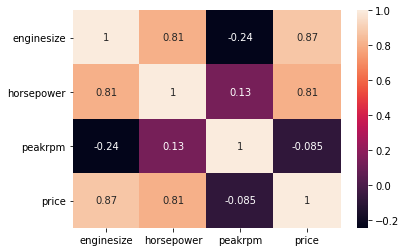

In [17]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

In [18]:
endog = df["price"]
exog = sm.add_constant(df[["enginesize", "horsepower", "peakrpm"]])
print(exog)

     const  enginesize  horsepower  peakrpm
0      1.0         130         111     5000
1      1.0         130         111     5000
2      1.0         152         154     5000
3      1.0         109         102     5500
4      1.0         136         115     5500
..     ...         ...         ...      ...
200    1.0         141         114     5400
201    1.0         141         160     5300
202    1.0         173         134     5500
203    1.0         145         106     4800
204    1.0         141         114     5400

[205 rows x 4 columns]


In [23]:
X = exog.to_numpy()
Y = endog.to_numpy()
m1_tp = np.transpose(X)
print(tp)

[[1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00
  1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00
  1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00
  1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00
  1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00
  1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00
  1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00
  1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00
  1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00
  1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00
  1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00
  1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00
  1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00
  1.00e+00 1.00e+00 1.00e+00 1.00e+00 

In [24]:
m2_mul1 = np.matmul(m1_tp, X)
print(m2_mul1)

[[2.0500000e+02 2.6016000e+04 2.1344000e+04 1.0506500e+06]
 [2.6016000e+04 3.6553800e+06 2.9807370e+06 1.3234380e+08]
 [2.1344000e+04 2.9807370e+06 2.5412780e+06 1.0989495e+08]
 [1.0506500e+06 1.3234380e+08 1.0989495e+08 5.4311225e+09]]


In [25]:
m3_inv = np.linalg.inv(m2_mul1)
print(m3_inv)

[[ 1.05745227e+00 -2.48656559e-03  2.08844699e-03 -1.86230465e-04]
 [-2.48656559e-03  1.29038938e-05 -1.16394136e-05  4.02103353e-07]
 [ 2.08844699e-03 -1.16394136e-05  1.36884040e-05 -3.97359677e-07]
 [-1.86230465e-04  4.02103353e-07 -3.97359677e-07  3.44523575e-08]]


In [26]:
m4_mul = np.matmul(m3_inv, m1_tp)
print(m4_mul)

[[ 3.48640368e-02  3.48640368e-02  6.99628143e-02 -2.48293412e-02
  -6.48168012e-02 -7.52590361e-02 -7.52590361e-02 -7.52590361e-02
  -1.72798585e-04  4.15961412e-02 -8.03003620e-02 -8.03003620e-02
   1.10878125e-01  1.10878125e-01  1.10878125e-01 -8.77870944e-02
  -8.77870944e-02 -8.77870944e-02  5.62418556e-02 -2.57918521e-02
  -2.57918521e-02 -4.85917926e-02 -4.85917926e-02  2.52288027e-03
  -4.85917926e-02 -4.85917926e-02 -4.85917926e-02  2.52288027e-03
   6.72228077e-03  4.12205291e-02  5.59119317e-02 -1.29972580e-01
  -3.79471470e-02 -1.29972580e-01 -1.29972580e-01 -1.29972580e-01
  -1.29972580e-01 -1.16600198e-01 -1.16600198e-01 -1.16600198e-01
  -1.16600198e-01 -8.52734932e-02 -3.14928007e-02  5.04361253e-02
  -2.57918521e-02 -2.57918521e-02  1.83588715e-02 -1.01109688e-01
  -1.01109688e-01 -1.37147323e-01  4.20368742e-02  4.20368742e-02
   4.20368742e-02  4.20368742e-02  4.20368742e-02 -2.30569627e-02
  -2.30569627e-02 -2.30569627e-02  2.30845790e-02  3.56145858e-02
   3.56145

In [29]:
m5_result = np.matmul(m4_mul, Y)
print(m5_result)

[-1.31252357e+04  1.32671775e+02  4.87432865e+01  8.76060910e-01]


In [30]:
mod = sm.OLS(endog, exog)
results = mod.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     259.9
Date:                Sun, 18 Oct 2020   Prob (F-statistic):           6.70e-69
Time:                        08:20:41   Log-Likelihood:                -1970.0
No. Observations:                 205   AIC:                             3948.
Df Residuals:                     201   BIC:                             3961.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.313e+04   3746.743     -3.503      0.0

In [33]:
from sklearn import linear_model
x = df[["enginesize", "horsepower", "peakrpm"]]
y = df["price"]
lm = linear_model.LinearRegression()
linreg = lm.fit(x, y)
lm.coef_

array([132.67177482,  48.74328646,   0.87606091])

In [34]:
lm.intercept_

-13125.235746663955